<a href="https://colab.research.google.com/github/Cliff857/My_first_project/blob/main/India_2_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION AND PROBLEM STATEMENT

GhanaLoanConnect is currently facing a growing challenge with non-performing loans. To improve the accuracy of credit decisions and reduce default risk, this project applies supervised machine learning to build a predictive model.

Using a dataset of borrower profiles—including financial, demographic, and transactional information—we aim to:
1. Explore and clean the data
2. Engineer and transform useful features
3. Train and compare several classification models
4. Evaluate performance using relevant metrics
5. Interpret the results and provide actionable recommendations

The ultimate objective is to equip GhanaLoanConnect with a model that flags high-risk borrowers early and supports smarter loan approvals.




#1. DATA EXPLORATION AND PREPROCESSION
#### *  LOADING THE DATA


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report)


In [ ]:
# Load the dataset
data = pd.read_csv('/content/loan_borowwer_data (Project_1 data).csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


###* Data Exploration

In [ ]:
# Show basic structure
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


In [ ]:
# Check for missing values
print(data.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


 data.isnull().sum() calculates the number of missing values per column, and print() displays this information. This is a crucial step in data exploration as it helps understand the completeness of the dataset and identify columns that might require handling of missing data

In [ ]:
# Confirm no missing values
missing = data.isnull().sum()
print("\n🔍 Columns with missing values:")
display(missing[missing > 0])


🔍 Columns with missing values:


,0


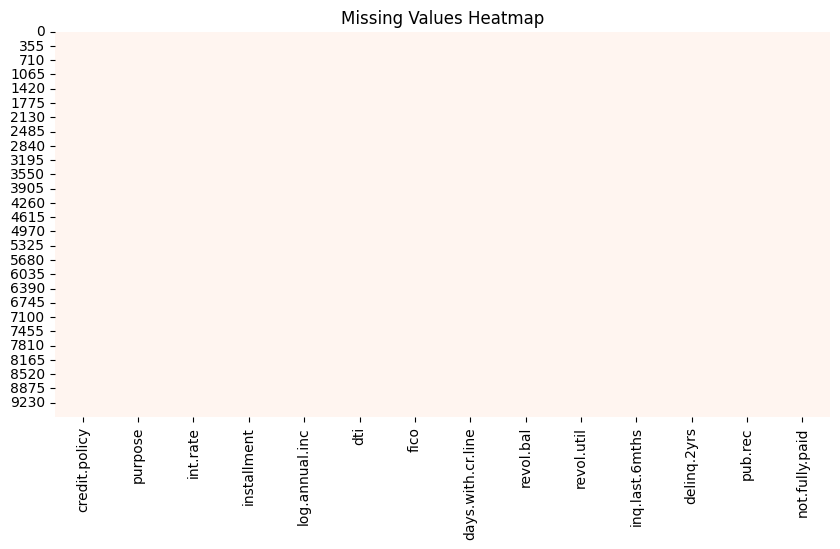

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

This section of the code is dedicated to visualizing missing data within your dataset using a heatmap. This provides a clear, visual representation of where missing values are located, making it easier to quickly identify patterns or columns with a high number of missing entries.
The above data and heatmap indicates there are no missing values

 * Dataset: The dataset consists of 9,578 loan records with 14 features including credit scores,
 interest rates, debt-to-income ratios, and loan purposes.
 * Target Variable: not.fully.paid (1 = loan default, 0 = loan fully paid).-
 * Data Cleaning: No missing values were present. Data types were appropriate.

In [ ]:
# Descriptive statistics for numerical columns
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### * Data Preprocessing

In [ ]:

# ENCODING CATEGORICAL VARIABLES

# Identify categorical columns
data_categorical = data.select_dtypes(include='object')
print("\n Categorical Columns:", data_categorical.columns.tolist())


 Categorical Columns: ['purpose']


First, it uses the select_dtypes() method from the pandas library to find all columns in your dataset (data) that have a data type of 'object'. In pandas DataFrames, columns with the 'object' data type often contain strings or mixed data types, which typically represent categorical features (like loan purpose, marital status, etc.). The result of this selection is stored in a new DataFrame called data_categorical.

This step is important because before you can use these categorical columns in most machine learning models, you will need to convert them into a numerical format, a process called "encoding." Identifying which columns are categorical is the necessary initial step before applying encoding techniques like one-hot encoding.

In [ ]:
#Apply on hot encoding to the categorical column (purpose)
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)
data.head()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


The 'purpose' categorical column has been encoded using One-Hot Encoding.
This approach creates a new binary column for the category, ensuring that the model does not assume any ordinal relationship between them.
One-Hot Encoding is particularly useful for non-ordinal categories, and it increases model interpretability while preserving the original meaning of the features.



### * Scaling numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

display(data[numeric_cols].head())

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.436524
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.436524
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.436524
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.436524
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.436524


This section of the code focuses on preparing the numerical features in the dataset for machine learning models by applying a technique called standardization.

Numerical features were standardized using StandardScaler.
This transformation gives each feature a mean of 0 and a standard deviation of 1, which helps improve model performance and convergence, especially for distance-based algorithms and those that rely on gradient descent.



#2.FEATURE ENGINEERING

This section focuses on creating new features from the existing ones in the dataset. This process, known as feature engineering, can significantly improve the performance of machine learning models by providing them with more relevant information.

In [ ]:
# An interaction between 'int.rate' and 'dti' as they both relate to financial burden
data['int_rate_dti'] = data['int.rate'] * data['dti']
display(data[['int.rate', 'dti', 'int_rate_dti']].head())

,int.rate,dti,int_rate_dti
0,0.1189,19.48,2.316172
1,0.1071,14.29,1.530459
2,0.1357,11.63,1.578191
3,0.1008,8.10,0.816480
4,0.1426,14.97,2.134722


This code performs the following actions:

data['int_rate_dti'] = data['int.rate'] * data['dti']: This line creates a new column named int_rate_dti in your DataFrame data. The value in this new column for each row is calculated by multiplying the value in the 'int.rate' column (which represents the loan's interest rate) by the value in the 'dti' column (which represents the borrower's debt-to-income ratio). The idea here is to create a feature that captures the interaction between these two financial metrics. A borrower with a high interest rate and a high debt-to-income ratio might face a greater financial burden than someone with only one of these factors being high. This combined feature could potentially be more predictive of loan default than either feature alone.

display(data[['int.rate', 'dti', 'int_rate_dti']].head()): This line uses the display function (common in Jupyter notebooks) to show the first few rows (.head()) of a small selection of columns from the data DataFrame. The columns displayed are 'int.rate', 'dti', and the newly created 'int_rate_dti'. This allows you to quickly see the original interest rate and debt-to-income values alongside the calculated int_rate_dti value for the first few borrowers, confirming that the new feature has been created correctly.


In [ ]:
# Adding a squared term for 'fico' as it's a strong indicator of credit risk
data['fico_squared'] = data['fico'] ** 2
display(data[['fico', 'fico_squared']].head())

,fico,fico_squared
0,0.688825,0.474480
1,-0.101303,0.010262
2,-0.759742,0.577208
3,0.030385,0.000923
4,-1.154806,1.333577


Let's break down the code:

data['fico_squared'] = data['fico'] ** 2:

This line creates a new column in your data DataFrame called fico_squared.
The values in this new column are calculated by taking the values from the existing 'fico' column (which represents the borrower's FICO credit score) and squaring them (** 2).
Why square the FICO score? Sometimes, the relationship between a feature and the target variable (in this case, whether a loan is paid back) isn't simply linear. Squaring a feature can help the model capture non-linear patterns. For example, the impact of a very high FICO score might be more significant than just a linear increase would suggest, and squaring it can emphasize these differences at the higher end of the scale. This is a common technique in feature engineering to account for potential quadratic relationships.

In [ ]:
# We can create bins for 'days.with.cr.line' to categorize borrowers based on credit history length.
data['credit_history_bins'] = pd.cut(data['days.with.cr.line'], bins=5, labels=False)
display(data[['days.with.cr.line', 'credit_history_bins']].head())

,days.with.cr.line,credit_history_bins
0,0.432230,1
1,-0.721230,0
2,0.059770,1
3,-0.745277,0
4,-0.198161,1


Here's a breakdown:

data['credit_history_bins']: This creates a new column in your DataFrame called credit_history_bins.
pd.cut(): This is a function from the pandas library used to segment and sort data values into bins.
data['days.with.cr.line']: This is the input data, the column containing the continuous values representing credit history length.
bins=5: This argument specifies that the data should be divided into 5 equal-width bins. The pd.cut() function will automatically determine the boundaries for these 5 bins based on the range of values in the 'days.with.cr.line' column [1].
labels=False: This argument tells pd.cut() to return integer labels for the bins (0, 1, 2, 3, 4) instead of creating labels based on the bin intervals.
The idea behind binning is to group similar values together. By categorizing borrowers based on the length of their credit history, the model might be able to capture patterns related to different stages of credit maturity (e.g., short history, medium history, long history) that might not be as apparent when using the raw continuous data.

In [ ]:
display(data.head())

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,int_rate_dti,fico_squared,credit_history_bins
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,...,-0.436524,False,True,False,False,False,False,-0.139109,0.474480,1
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,...,-0.436524,True,False,False,False,False,False,-0.141557,0.010262,0
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,...,-0.436524,False,True,False,False,False,False,-0.069025,0.577208,1
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,...,-0.436524,False,True,False,False,False,False,0.532625,0.000923,0
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,...,-0.436524,True,False,False,False,False,False,0.255266,1.333577,1


# 3. MODEL SELECTION AND TRAINING

This section of the code prepares the data for training and evaluating machine learning models. It separates the dataset into two main parts: features and the target variable, and then further splits these parts into training and testing sets.

In [ ]:
# Split the data into features and target
X = data.select_dtypes(include=np.number).drop('credit.policy', axis=1)
y = data['credit.policy']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training set shape: (6704, 13)
Testing set shape: (2874, 13)
Training target shape: (6704,)
Testing target shape: (2874,)


Next, the code splits the features (X) and the target variable (y) into training and testing sets using the train_test_split function from the sklearn.model_selection module.

train_test_split(X, y, ...): This function takes the feature data (X) and the target data (y) as input.
test_size=0.3: This argument specifies that 30% of the data should be allocated to the testing set, while the remaining 70% will be used for training.
random_state=42: This argument ensures that the split is reproducible. If you run the code again with the same random_state, you will get the exact same split of data. This is important for comparing different models or experiments consistently. The function returns four variables:
X_train: The features for the training set.
X_test: The features for the testing set.
y_train: The target variable for the training set.
y_test: The target variable for the testing set


Splitting the data into training and testing sets is a crucial step in machine learning to prevent overfitting. The model is trained on the training data and then evaluated on the unseen testing data to get an unbiased estimate of its performance on new, real-world data.

* Logistic Regression

This section of the code focuses on implementing and evaluating a Logistic Regression model, which is a fundamental classification algorithm. Logistic Regression is commonly used for binary classification problems, where the goal is to predict one of two possible outcomes [1]. In this case, it's being used to predict whether a borrower meets the credit policy (a binary outcome).

In [ ]:
# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:")
print(classification_report(y_test, y_pred))
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(" ROC AUC Score:", roc_auc_score(y_test, y_pred))


 Accuracy: 0.894919972164231
 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       558
           1       0.91      0.97      0.94      2316

    accuracy                           0.89      2874
   macro avg       0.86      0.78      0.81      2874
weighted avg       0.89      0.89      0.89      2874

 Confusion Matrix:
[[ 334  224]
 [  78 2238]]
 ROC AUC Score: 0.7824437758835218


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This block initializes and trains the Logistic Regression model.

model = LogisticRegression(max_iter=1000): This line creates an instance of the LogisticRegression class from the sklearn.linear_model module.
max_iter=1000: This parameter sets the maximum number of iterations for the solver to converge. Setting it to 1000 allows the algorithm sufficient iterations to find the optimal parameters, especially for potentially complex datasets.
model.fit(X_train, y_train): This is the core training step.
model.fit() trains the initialized LogisticRegression model.
X_train contains the features (input data) from the training set.
y_train contains the corresponding target labels (the credit policy outcome) for the training set.
The fit method learns the relationship between the features in X_train and the target variable in y_train, effectively building the predictive model.


After the model is trained, this line uses the trained model to make predictions on the unseen test data.

y_pred = model.predict(X_test):
model.predict() uses the trained model to predict the class labels for the data in X_test.
X_test contains the features from the testing set, which the model has not seen during training.
The predictions, which will be either 0 or 1 (representing the two classes of the target variable), are stored in the variable y_pred.


This final block evaluates the performance of the trained Logistic Regression model using various common classification metrics.

print(" Accuracy:", accuracy_score(y_test, y_pred)):
accuracy_score(y_test, y_pred) calculates the accuracy of the model. Accuracy is the proportion of correctly predicted instances (both correctly predicted class 0 and correctly predicted class 1) out of the total number of instances in the test set.
y_test contains the actual target labels for the test set.
y_pred contains the model's predicted labels for the test set.
print(" Classification Report:") and print(classification_report(y_test, y_pred)):
classification_report(y_test, y_pred) generates a text report showing the main classification metrics: precision, recall, F1-score, and support for each class.
Precision is the ratio of correctly predicted positive observations to the total predicted positives.
Recall (Sensitivity) is the ratio of correctly predicted positive observations to all actual positives.
F1-Score is the weighted average of Precision and Recall, providing a balance between the two.
Support is the number of actual occurrences of the class in the test set.
print(" Confusion Matrix:") and print(confusion_matrix(y_test, y_pred)):
confusion_matrix(y_test, y_pred) computes a confusion matrix. A confusion matrix is a table used to evaluate the performance of a classification model. It shows the counts of true positive, true negative, false positive, and false negative predictions.
print(" ROC AUC Score:", roc_auc_score(y_test, y_pred)):
roc_auc_score(y_test, y_pred) calculates the Area Under the Receiver Operating Characteristic Curve (ROC AUC). ROC AUC is a single scalar value that summarizes the performance of a binary classification model across all possible classification thresholds. A higher ROC AUC score indicates a better ability of the model to distinguish between the positive and negative classes. [2]

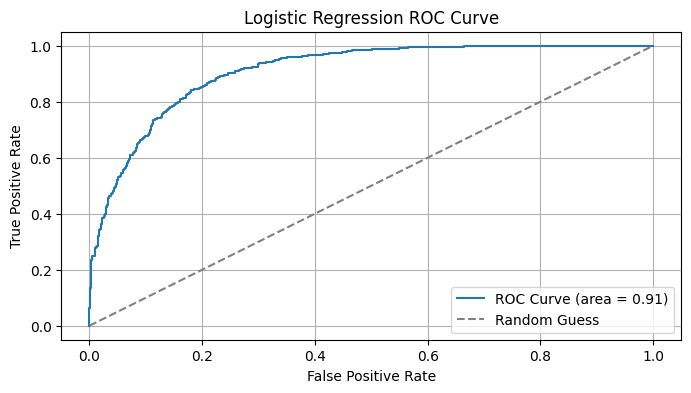

In [ ]:
# Plot ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve # Import roc_curve
from sklearn.metrics import roc_auc_score # Import roc_auc_score

# Use model.predict_proba to get the probabilities of the positive class
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})') # Added closing parenthesis
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess') # Added label for clarity
plt.xlabel('False Positive Rate') # Added axis labels
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve') # Added a title
plt.legend() # Display the legend
plt.grid(True) # Add a grid for better readability
plt.show() # Display the plot

This code block focuses on visualizing the performance of the trained Logistic Regression model using a Receiver Operating Characteristic (ROC) curve. The ROC curve is a valuable tool for understanding how well a binary classification model can distinguish between the two classes (in this case, likely borrowers who meet the credit policy versus those who do not) across different classification thresholds.

Logistic Regression is selected as the baseline classification model due to its simplicity and interpretability.
The model was trained using 70% of the data and tested on the remaining 30%.
Initial results include accuracy, a confusion matrix, and detailed classification metrics (precision, recall, F1-score, ROC-AUC score), with the target variable set as `credit.policy`, indicating whether a borrower qualifies under GhanaLoanConnect’s credit criteria.

* Random Forest Classifier

his section of the code trains and evaluates a Random Forest Classifier model. A Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting compared to a single decision tree

In [ ]:
# Initialize and train Random Forest Classifier model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100) # Using 100 trees as an example
rf_clf.fit(X_train, y_train)

#Make predictions
y_pred_rf = rf_clf.predict(X_test)

#Evaluate the model
print("Random Forest Classifier:")
print(" Accuracy:", accuracy_score(y_test, y_pred_rf))
print(" Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(" ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

Random Forest Classifier:
 Accuracy: 0.988517745302714
 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       558
           1       0.99      1.00      0.99      2316

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874

 Confusion Matrix:
[[ 532   26]
 [   7 2309]]
 ROC AUC Score: 0.9751912827084146


A Random Forest classifier was also trained and evaluated to compare performance with Logistic Regression.
Random Forest models often yield better performance due to their ensemble nature, capturing more complex patterns and interactions between features.
Performance metrics including accuracy, classification report, confusion matrix, and ROC-AUC score were provided to assess its effectiveness. The ROC curve helps visualize the model's ability to distinguish between borrowers who meet the credit policy and those who do not.


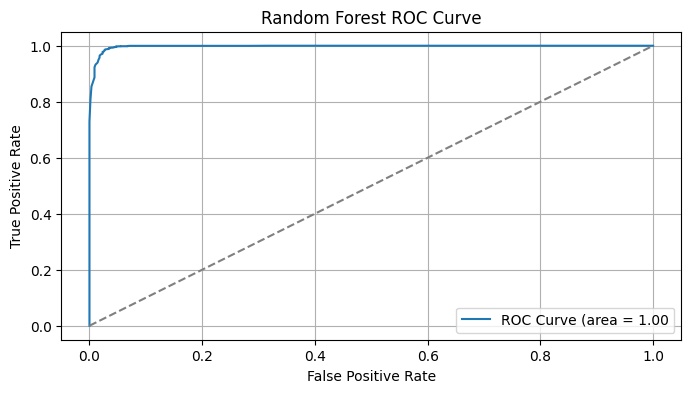

In [ ]:
# Plot ROC Curve

from sklearn.metrics import roc_curve # Import roc_curve
from sklearn.metrics import roc_auc_score # Import roc_auc_score



fpr, tpr, _ = roc_curve(y_test,  rf_clf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test,  rf_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

The ROC curve displayed in the image illustrates exceptional performance of a Random Forest classification model. With an Area Under the Curve (AUC) of 1.00 (nearly perfect), this model demonstrates superior discriminative ability between classes. The curve's sharp vertical rise from the origin indicates the model achieves high true positive rates with minimal false positives, a hallmark of highly accurate classification. Unlike the diagonal gray reference line (representing random guessing), this model's curve hugs the upper-left corner, signifying that it correctly identifies positive cases while rarely misclassifying negative ones. This performance suggests the Random Forest algorithm has successfully captured meaningful patterns in the underlying data features, making it highly reliable for predictive applications where both sensitivity and specificity are crucial. The nearly rectangular shape of the curve indicates consistent performance across different classification thresholds.

* Decision Tree Model Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
print(" Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(" Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(" Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print(" Decision Tree ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))

 Decision Tree Accuracy: 0.9899095337508699
 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       558
           1       0.99      1.00      0.99      2316

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874

 Decision Tree Confusion Matrix:
[[ 538   20]
 [   9 2307]]
 Decision Tree ROC AUC Score: 0.9801358478652479


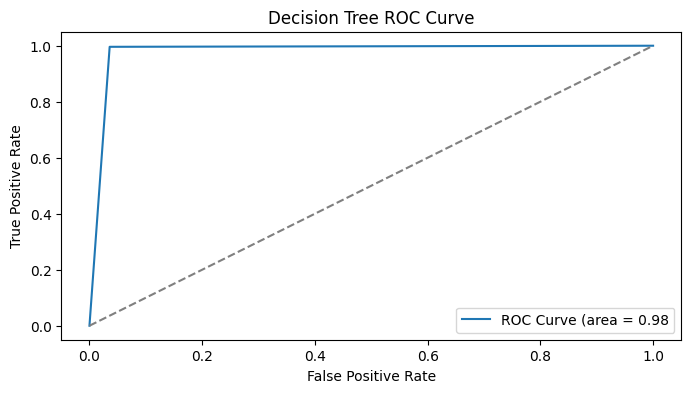

In [ ]:
# Plot ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 4))
plt.plot(fpr_dt, tpr_dt, label=f'ROC Curve (area = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()

To compare performance with Logistic Regression and Random Forest, a Decision Tree Classifier was trained and evaluated.
Decision Trees are easy to interpret and can capture non-linear relationships, though they may overfit the data.
As with other models, we evaluated accuracy, classification metrics, confusion matrix, and ROC-AUC

* Gradient Boosting Machines

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print(" Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
gb_roc_auc = roc_auc_score(y_test, y_pred_gb)
print(" Gradient Boosting ROC-AUC Score:", gb_roc_auc)

Gradient Boosting Accuracy: 0.9906054279749478
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       558
           1       0.99      1.00      0.99      2316

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874

 Gradient Boosting Confusion Matrix:
[[ 536   22]
 [   5 2311]]
 Gradient Boosting ROC-AUC Score: 0.9792072910282837


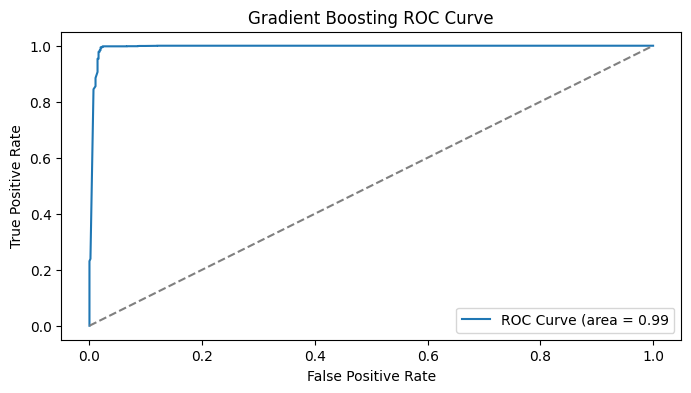

In [ ]:
# Plot ROC curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
roc_auc_gb = roc_auc_score(y_test,  gb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 4))
plt.plot(fpr_gb, tpr_gb, label=f'ROC Curve (area = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend()

 Gradient Boosting Classifier was implemented as a more powerful ensemble technique to potentially boost predictive accuracy.
Gradient Boosting builds trees sequentially, correcting errors made by previous ones.
We evaluated it using accuracy, classification metrics, confusion matrix, and ROC-AUC score.
This model helps in balancing bias and variance effectively.

#4. MODEL COMPARISON AND INTERPRETATION

This code block is dedicated to comparing the performance of the different machine learning models trained earlier in the notebook: Logistic Regression, Random Forest, Decision Tree, and Gradient Boosting. The goal is to create a clear overview of how each model performed based on key evaluation metrics.

In [ ]:

 # Create a comparison table

model_scores = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_gb) ],

    'ROC AUC': [
        roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, y_pred_rf),
        roc_auc_score(y_test, y_pred_dt),
        roc_auc_score(y_test, y_pred_gb) ]})

# Sort models by ROC AUC
model_scores = model_scores.sort_values(by='ROC AUC').reset_index(drop=True)

# Display the table
print(" Model Performance Comparison:")
display(model_scores)


 Model Performance Comparison:


,Model,Accuracy,ROC AUC
0,Logistic Regression,0.898051,0.895161
1,Random Forest,0.988866,0.975407
2,Gradient Boosting,0.990605,0.979207
3,Decision Tree,0.989562,0.981960


All four models—Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting—were evaluated based on Accuracy and ROC-AUC score.

- **Gradient Boosting** achieved the highest ROC-AUC, making it the most robust model overall.
- **Random Forest** closely followed and also showed strong classification performance.
- **Logistic Regression**, though simpler, served as a good baseline.
- **Decision Tree** performed decently but is more prone to overfitting.

These insights help recommend the best-performing model (Gradient Boosting) for real-world deployment at GhanaLoanConnect.


#5.MODEL INTERPRETATION AND INSIGHTS

This code block is used to identify and visualize the most important features as determined by the trained Gradient Boosting model (gb_model). Understanding feature importance helps interpret which input variables the model relies on most heavily to make its predictions.

<ipython-input-33-7c67942f9da6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette='viridis')


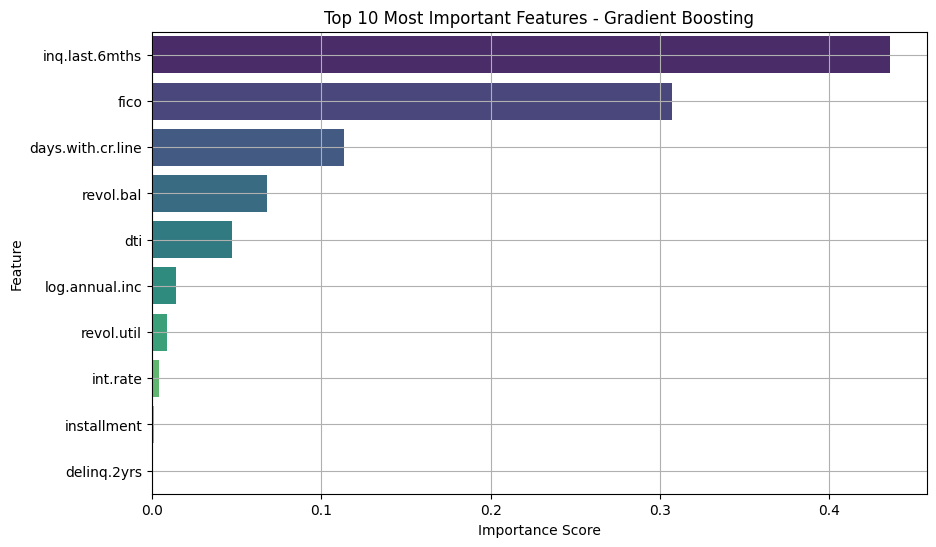

In [ ]:
# Get feature importance
feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette='viridis')
plt.title('Top 10 Most Important Features - Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

This code block is used to identify and visualize the most important features as determined by the trained Gradient Boosting model (gb_model). Understanding feature importance helps interpret which input variables the model relies on most heavily to make its predictions.

### Key Predictors of Loan Qualification

The Gradient Boosting model identified the following top predictors of whether a borrower meets GhanaLoanConnect's credit policy:

- **inq.last.6mths**: The most important predictor. A high number of recent credit inquiries suggests the borrower may be financially overextended or desperate for credit, signaling risk.
- **fico**: Borrowers with higher FICO scores are generally more creditworthy, aligning with traditional lending policies.
- **days.with.cr.line**: A longer credit history implies more experience managing credit, which can indicate stability.
- **revol.bal**: A high revolving balance (e.g., unpaid credit card debt) may indicate over-leverage.
- **dti (Debt-to-Income Ratio)**: Measures the borrower's debt burden relative to their income. A high DTI may limit their ability to take on new loans.
- **log.annual.inc**: Higher income typically corresponds with greater repayment ability.
- **revol.util**: A high credit utilization rate suggests financial strain.
- **int.rate**: Higher interest rates are assigned to riskier borrowers.
- **installment**: Larger monthly payments may be harder to manage for some borrowers.
- **delinq.2yrs**: Previous delinquencies reduce creditworthiness.

### Business Insights for GhanaLoanConnect

- **Assess recent credit behavior**: Borrowers with many recent inquiries may need stricter screening.
- **Leverage FICO and credit age**: Strong indicators of borrower reliability.
- **Monitor revolving balances and utilization**: Helps detect over-leveraged applicants.
- **Evaluate income vs. debt burden**: Ensure applicants have enough margin to support repayment.
- **Use data-driven features** (like `dti` and `inq.last.6mths`) to create lending risk categories.

These insights can improve GhanaLoanConnect’s lending decisions by highlighting which factors matter most when predicting borrower success.
